In [46]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=2)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

import torch
import glob
from collections import defaultdict

In [47]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
           data[k].append(d[k]) 
        
    return data

In [106]:
# Learn VAE online
exp151_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp151_*") 
exp151 = get_data(exp151_files, "correct")

exp152_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp152_*") 
exp152 = get_data(exp152_files, "correct")

# Pretrain VAE (fixed for all exps)
exp153_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp153_*") 
exp153 = get_data(exp153_files, "correct")

exp154_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp154_*") 
exp154 = get_data(exp154_files, "correct")

# Sparse projection
exp155_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155_*") 
exp155 = get_data(exp155_files, "correct")

exp156_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp156_*") 
exp156 = get_data(exp156_files, "correct")

# Learn VAE 

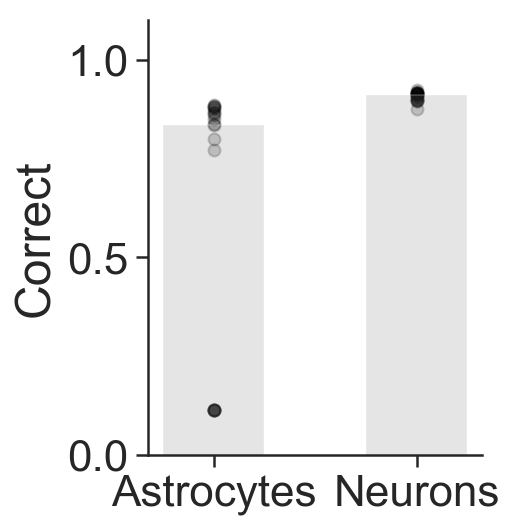

In [113]:
# Est stats
models = ["AAN", "ANN"]
means = [np.median(exp151["correct"]), np.median(exp152["correct"])]

fig = plt.figure(figsize=(3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.bar(models, means, color="grey", alpha=0.2, width=0.5)
plt.scatter(x=np.repeat(0, 20), y=exp151["correct"], color="black", alpha=0.2)
plt.scatter(x=np.repeat(1, 20), y=exp152["correct"], color="black", alpha=0.2)
plt.xticks(np.array([0,1]), ('Astrocytes', 'Neurons'))
plt.ylim(0, 1.1)
plt.ylabel("Correct")
_ = sns.despine()

# Fixed VAE

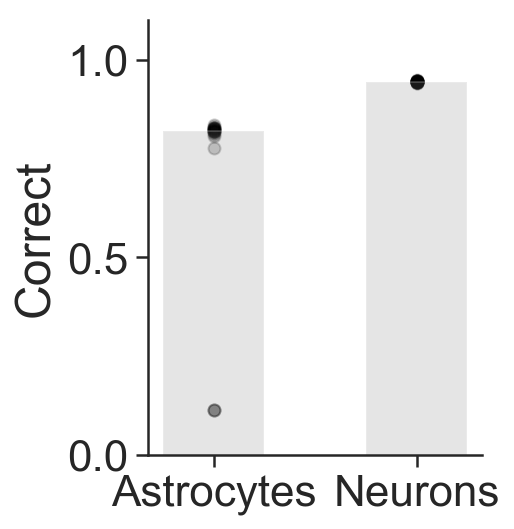

In [112]:
# Est stats
models = ["AAN", "ANN"]
means = [np.median(exp153["correct"]), np.median(exp154["correct"])]

fig = plt.figure(figsize=(3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.bar(models, means, color="grey", alpha=0.2, width=0.5)
plt.scatter(x=np.repeat(0, 20), y=exp153["correct"], color="black", alpha=0.2)
plt.scatter(x=np.repeat(1, 20), y=exp154["correct"], color="black", alpha=0.2)
plt.xticks(np.array([0,1]), ('Astrocytes', 'Neurons'))
plt.ylim(0, 1.1)
plt.ylabel("Correct")
_ = sns.despine()

# Sparse projection

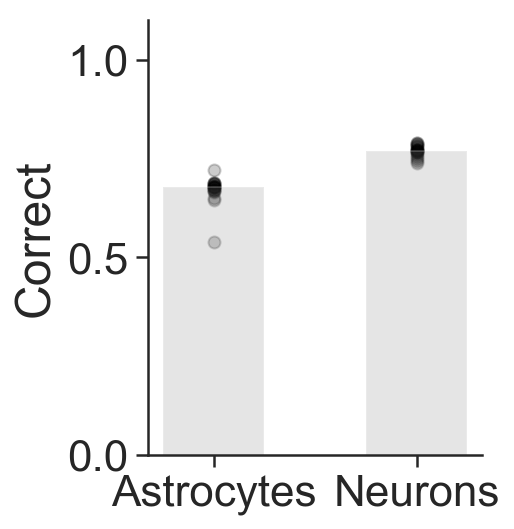

In [111]:
# Est stats
models = ["AAN", "ANN"]
means = [np.median(exp155["correct"]), np.median(exp156["correct"])]

fig = plt.figure(figsize=(3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.bar(models, means, color="grey", alpha=0.2, width=0.5)
plt.scatter(x=np.repeat(0, 20), y=exp155["correct"], color="black", alpha=0.2)
plt.scatter(x=np.repeat(1, 20), y=exp156["correct"], color="black", alpha=0.2)
plt.xticks(np.array([0,1]), ('Astrocytes', 'Neurons'))
plt.ylim(0, 1.1)
plt.ylabel("Correct")
_ = sns.despine()